
# Redes Neurais Densas - Classificação de Dígitos com MNIST

OBJETIVO: Criar e treinar uma Rede Neural Densa para classificação de imagens utilizando a biblioteca MNIST.

In [1]:
import keras
from keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
from keras.utils import to_categorical
y_matrizTreino = to_categorical(y_treino)
y_matrizTeste = to_categorical(y_teste)

In [4]:
x_treino.shape

(60000, 28, 28)

In [5]:
x_teste.shape

(10000, 28, 28)

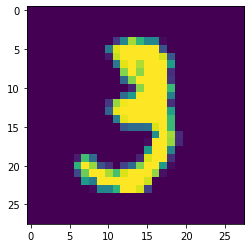

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[10])

In [7]:
x_treino_1 = x_treino.reshape(60000, 784)
x_teste_1 = x_teste.reshape(10000, 784)

In [8]:
x_treinoAjustado = x_treino_1.astype('float32') / 255
x_testeAjustado = x_teste_1.astype('float32') / 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, Adamax, RMSprop

In [10]:
otimizador = RMSprop(learning_rate=0.005)

modelo = Sequential()
modelo.add(Dense(10,input_dim=784, kernel_initializer='normal',activation='relu'))
modelo.add(Dense(10, input_dim=784, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(10, activation='softmax'))

In [11]:
modelo.compile(optimizer=otimizador, loss='categorical_crossentropy', metrics=['acc'])

In [12]:
testes = modelo.fit(x_treinoAjustado, y_matrizTreino, batch_size=200, epochs=10, validation_data=(x_testeAjustado, y_matrizTeste))

Epoch 1/10
300/300 [==============================] - 2s 3ms/step - loss: 1.1351 - acc: 0.6183 - val_loss: 0.3785 - val_acc: 0.8892
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3533 - acc: 0.8972 - val_loss: 0.3215 - val_acc: 0.9040
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2911 - acc: 0.9163 - val_loss: 0.2563 - val_acc: 0.9255
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2609 - acc: 0.9251 - val_loss: 0.2418 - val_acc: 0.9280
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2333 - acc: 0.9324 - val_loss: 0.2450 - val_acc: 0.9284
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2175 - acc: 0.9368 - val_loss: 0.2147 - val_acc: 0.9373
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2027 - acc: 0.9402 - val_loss: 0.2203 - val_acc: 0.9366
Epoch 8/10
300/300 [==============================] - 1s 2ms/step - loss: 0.

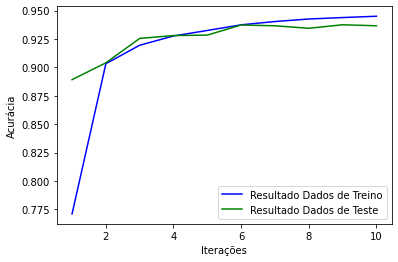

In [13]:
Resultado_treino = testes.history['acc']
Resultado_teste = testes.history['val_acc']
Epochs = range(1,len(Resultado_treino)+1)

plt.plot(Epochs, Resultado_treino, label='Resultado Dados de Treino', color='blue')
plt.plot(Epochs, Resultado_teste, '-g', label='Resultado Dados de Teste', color='green')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Acurácia')
plt.show()